In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv("gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [4]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
X =df.iloc[:,0:3]
y= df.iloc[:,7]

In [7]:
X.dtypes

AT    float64
AP    float64
AH    float64
dtype: object

In [8]:
y.shape

(15039,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

In [10]:
X_test

,AT,AP,AH
663,6.6824,1013.5,94.481
11652,30.6960,1014.4,55.209
2780,18.0910,1011.3,87.271
11044,20.5180,1007.5,89.969
11621,19.7700,1009.3,92.409
...,...,...,...
6499,14.5890,1012.9,80.707
2900,17.3870,1014.1,85.509
12419,22.8350,1007.0,78.223
9627,12.6310,1017.0,89.479


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [12]:
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
model = Sequential()
#adding the input layer and the first hidden layer
model.add(Dense(32,activation='relu',input_dim = 3))
#adding the second hidden layer
model.add(Dense(32,activation='relu'))
#Adding the third hidden layer
model.add(Dense(32,activation='relu'))

In [14]:
#output layer
model.add(Dense(1))

In [15]:
#Compiling the ANN
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train, batch_size=10,epochs=100)

Epoch 1/100
1053/1053 [==============================] - 1s 560us/step - loss: 2359.7100
Epoch 2/100
1053/1053 [==============================] - 1s 525us/step - loss: 240.2760
Epoch 3/100
1053/1053 [==============================] - 1s 639us/step - loss: 222.9061
Epoch 4/100
1053/1053 [==============================] - 1s 602us/step - loss: 218.7769
Epoch 5/100
1053/1053 [==============================] - 1s 567us/step - loss: 217.0423
Epoch 6/100
1053/1053 [==============================] - 1s 576us/step - loss: 215.3900
Epoch 7/100
1053/1053 [==============================] - 1s 547us/step - loss: 213.5732
Epoch 8/100
1053/1053 [==============================] - 1s 561us/step - loss: 212.6449
Epoch 9/100
1053/1053 [==============================] - 1s 567us/step - loss: 213.5505
Epoch 10/100
1053/1053 [==============================] - 1s 551us/step - loss: 212.5441
Epoch 11/100
1053/1053 [==============================] - 1s 541us/step - loss: 213.1226
Epoch 12/100
1053/1053 [=====

In [16]:
y_pred = model.predict(X_test)
y_pred

array([[139.12662],
       [129.80687],
       [121.76141],
       ...,
       [125.06898],
       [132.24763],
       [130.20181]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

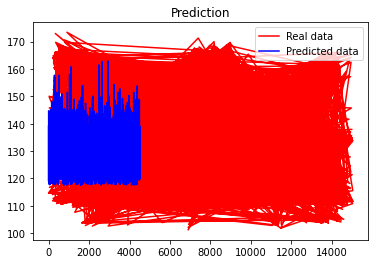

In [17]:
plt.plot(y_test, color='red', label='Real data')
plt.plot(y_pred, color='blue',label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show